In [1]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate, TriangleSignal, SquareSignal, SawtoothSignal, CubicSignal, zero_pad, Wave

PI2 = np.pi * 2

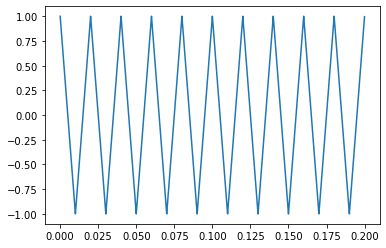

In [3]:
in_wave = TriangleSignal(freq=50).make_wave(duration=0.2, framerate=44100)
in_wave.plot()

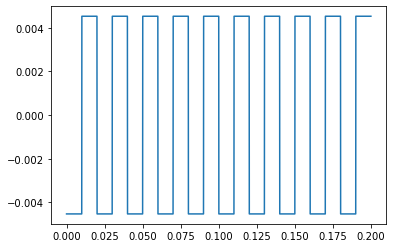

In [4]:
out_wave = in_wave.diff()
out_wave.plot()

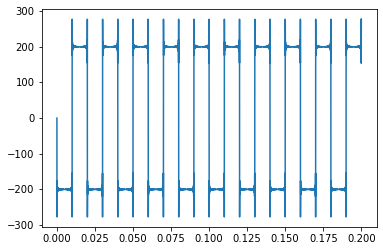

In [5]:
out_wave2 = in_wave.make_spectrum().differentiate().make_wave()
out_wave2.plot()

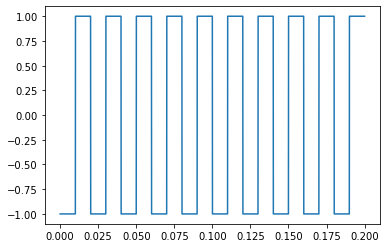

In [8]:
in_wave = SquareSignal(freq=50).make_wave(duration=0.2, framerate=44100)
in_wave.plot()

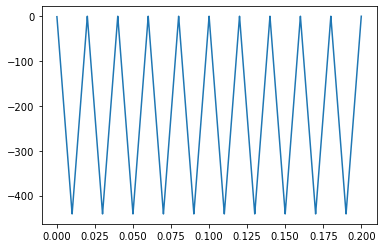

In [9]:
out_wave = in_wave.cumsum()
out_wave.plot()

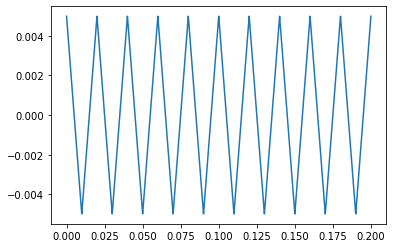

In [10]:
spectrum = in_wave.make_spectrum().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()

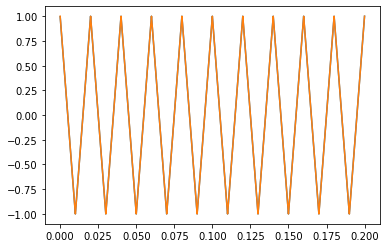

In [11]:
out_wave.unbias()
out_wave.normalize()
out_wave2.normalize()
out_wave.plot()
out_wave2.plot()

In [12]:
out_wave.max_diff(out_wave2)

0.0045351473922902175

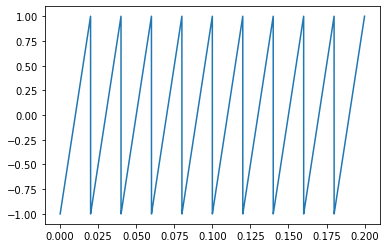

In [15]:
in_wave = SawtoothSignal(freq=50).make_wave(duration=0.2, framerate=44100)
in_wave.plot()

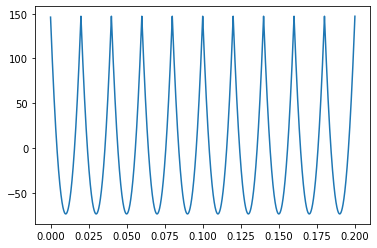

In [16]:
out_wave = in_wave.cumsum()
out_wave.unbias()
out_wave.plot()

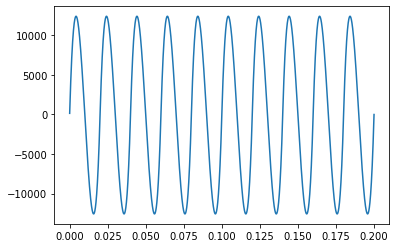

In [17]:
out_wave = out_wave.cumsum()
out_wave.plot()

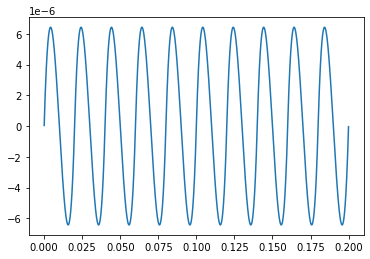

In [18]:
spectrum = in_wave.make_spectrum().integrate().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()

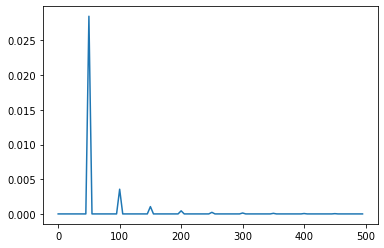

In [19]:
out_wave2.make_spectrum().plot(high=500)

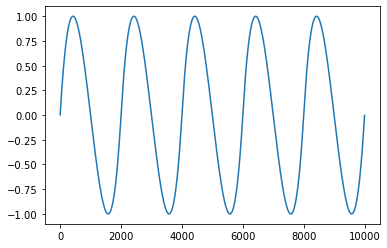

In [20]:
in_wave = CubicSignal(freq=0.0005).make_wave(duration=10000, framerate=1)
in_wave.plot()

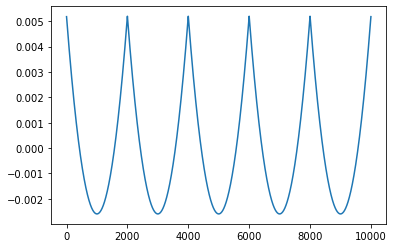

In [21]:
out_wave = in_wave.diff()
out_wave.plot()

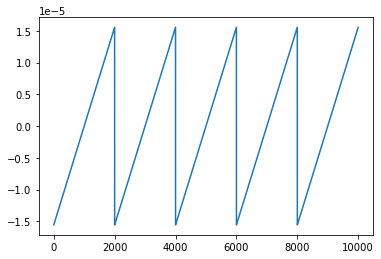

In [22]:
out_wave = out_wave.diff()
out_wave.plot()

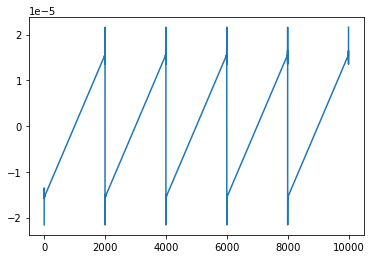

In [23]:
spectrum = in_wave.make_spectrum().differentiate().differentiate()
out_wave2 = spectrum.make_wave()
out_wave2.plot()

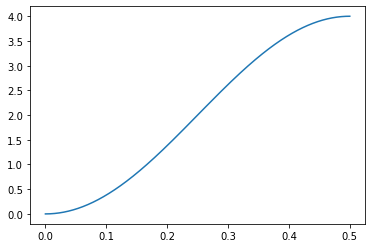

In [27]:
diff_window = np.array([-1.0, 2.0, -1.0])
padded = zero_pad(diff_window, len(in_wave))
diff_wave = Wave(padded, framerate=in_wave.framerate)
diff_filter = diff_wave.make_spectrum()
diff_filter.plot()

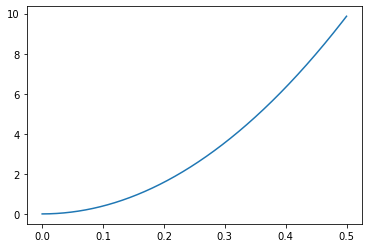

In [28]:
deriv_filter = in_wave.make_spectrum()
deriv_filter.hs = (PI2 * 1j * deriv_filter.fs)**2
deriv_filter.plot()

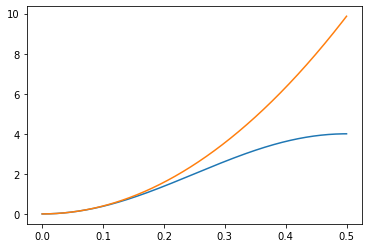

In [29]:
diff_filter.plot(label='2nd diff')
deriv_filter.plot(label='2nd deriv')